In [1]:
#import statements
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

import mindscope_utilities
import mindscope_utilities.visual_behavior_ophys as ophys

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

In [ ]:
experiment_id="880375092"
path="F:\\nma\\Project\\dataset\\PreprocessedFiles_Novel"

In [42]:
def load_aligned_data(experiment_id)  :
    path="F:\\nma\\Project\\dataset\\PreprocessedFiles_Novel"
    behavior_types=['running_speed','pupil_diameter', 'lick_rate']
    """Load aligned data from pickles + npy files.
    Experiment_id: experiment id as a string
    Path: path to the folder with data (absolute path is safest)
    behavior_types: running_speed, pupil_diameter, lick_rate. If passive, no lick rate!
    """
    
    
    neural_df = pd.read_pickle(os.path.join(path, f'ophys_aligned_neural_traces_{experiment_id}.p'))
    neural_ts = np.load(os.path.join(path,f'ophys_aligned_neural_traces_timestamps_{experiment_id}.npy'))
    behavior_df = pd.read_pickle(os.path.join(path,f'ophys_aligned_behavior_traces_{experiment_id}.p'))
    behavior_ts_dict = {}
    for bt in behavior_types:
        try:
            behavior_ts_dict[bt] = np.load(os.path.join(path, f'ophys_aligned_behavior_{bt}_traces_timestamps_{experiment_id}.npy'))
        except FileNotFoundError as e:
            if bt == 'lick_rate': 
                warnings.warn(f'Lick rate not found for experiment {experiment_id}, assuming passive, continuing...')
            else:
                raise(e)
    return neural_df, neural_ts, behavior_df, behavior_ts_dict

    


In [50]:
ids = ["880375092","950833329"]
res = list(map(load_aligned_data,ids))

    

<Figure size 432x288 with 0 Axes>

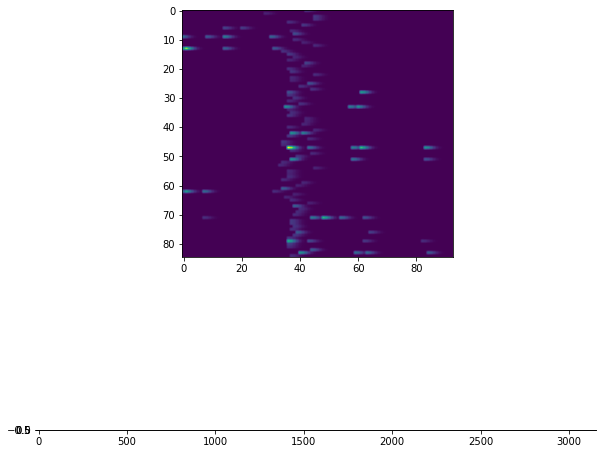

In [60]:
plt.figure()
fig, axs = plt.subplots(len(ids), 1, figsize=(10,10))
for ind,x in enumerate(res):
    aligned_neural_format = x[0]
    aligned_neural_ts_format = x[1]
    aligned_behavior_format = x[2]
    aligned_behavior_ts_format = x[3]
    x_z = 0
    for i,a in enumerate(aligned_neural_ts_format):
        if a == 0:
            x_z = i
    
    stim_id = 0
    mean_res = 0.000
    traces = aligned_neural_format.query('stimulus_presentations_id == @stim_id and mean_response > @mean_res')
    raw = np.stack(traces['trace'].to_numpy())
    raw = raw*255
    
    test = raw

    axs[ind].imshow(test)


plt.show()

In [54]:
aligned_neural_format = x[0]
aligned_neural_ts_format = x[1]
aligned_behavior_format = x[2]
aligned_behavior_ts_format = x[3]


In [59]:
aligned_neural_ts_format

array([-3.        , -2.99809883, -2.99619767, ...,  2.99437364,
        2.99627481,  2.99817597])

In [55]:
aligned_neural_format

,stimulus_presentations_id,trace,mean_response,baseline_response,p_value_gray_screen,cell_specimen_id
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,1086514113
1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,1086514479
2,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,1086514571
3,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,1086514803
4,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,1086515178
...,...,...,...,...,...,...
81680,4804,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,1086516905
81681,4804,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.011642,0.0,0.0,1086517071
81682,4804,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,1086517193
81683,4804,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.0,0.0,1086518562


In [27]:
for i,a in enumerate(aligned_neural_ts_format):
    if a == 0:
        print(i)

30


In [56]:
stim_id = 0
mean_res = 0.000
traces = aligned_neural_format.query('stimulus_presentations_id == @stim_id and mean_response > @mean_res')
raw = np.stack(traces['trace'].to_numpy())


In [57]:
raw.shape

(1, 3156)

C:\Users\sushr\AppData\Local\Temp\ipykernel_17304\1871105746.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


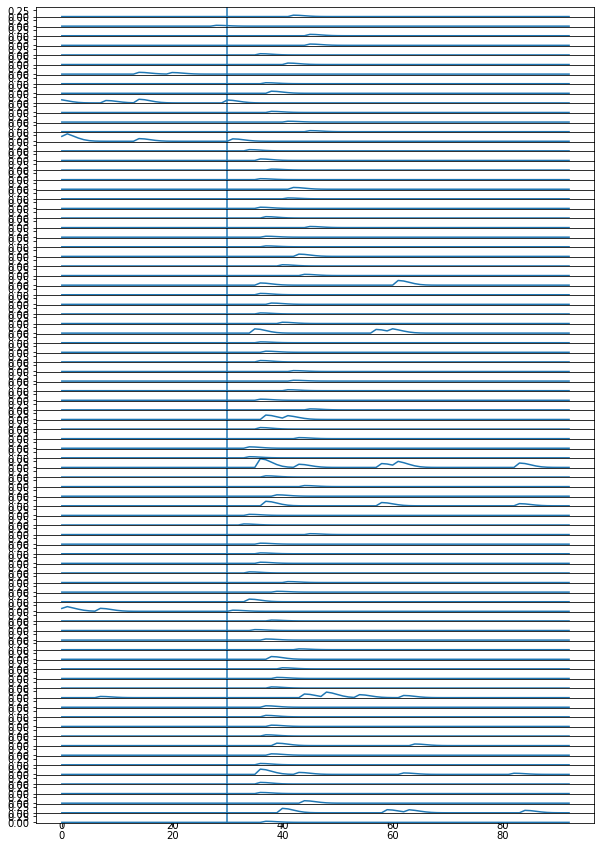

In [29]:

test = raw
fig, axs = plt.subplots(test.shape[0], 1, figsize=(10,15),sharey=True)
fig.subplots_adjust(hspace=0)

for i,a in enumerate(test):
    axs[i].plot(a)
    axs[i].axvline(x=30)

fig.tight_layout()

plt.show()


In [33]:
x= []
for i,r in aligned_neural_format.iterrows():
    x.append(len(r['trace']))
print(len(x),len(set(x)))

2453822 1


In [34]:
x[0]

93

In [24]:
print(len(aligned_neural_format['trace'][0]) ,len(aligned_behavior_format['trace_lick'][0]), len(aligned_behavior_format['trace_running'][0]))

93 360 360
